In [1]:
from matplotlib import pyplot as plt
import numpy as np


B/W (id): 
 [0 1 1 1 1 1 0 0 0]


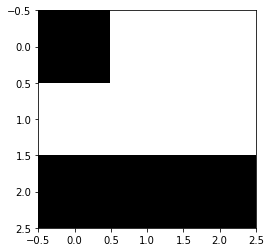

In [2]:
#Schwarz Weiß Bilder (1d)
bild = np.array([0,1,1,1,1,1,0,0,0], dtype=np.uint8)
print("\nB/W (id): \n", bild)
plt.imshow(bild.reshape((3,3)), cmap="gray")
plt.show()


gray (id): 
 [[  0 100 100]
 [255 255 255]
 [100 100   0]]


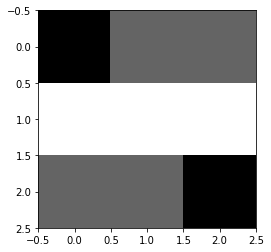

In [3]:
#Grauwert Bild (1d)
bild2 = np.array([
    [0,100,100],
    [255,255,255],
    [100,100,0]
], dtype=np.uint8)
print("\ngray (id): \n", bild2)
plt.imshow(bild2,cmap="gray")
plt.show()


RGB (2D):
 [[[100  42  78]
  [220  47 153]]

 [[100  42  78]
  [220  47 153]]]


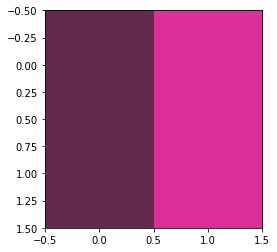

In [4]:
# RGB Bild (2d)
#                   R   G   B     R    G   B - jedes Array stellt 1 px dar
bild3 = np.array([[[100, 42, 78], [220, 47, 153]],
                [[100, 42, 78], [220, 47, 153]]],
                dtype=np.uint8)
print("\nRGB (2D):\n",bild3)
plt.imshow(bild3)
plt.show()


From RGB to Gray:
 [[63.36, 110.55999999999999], [63.36, 110.55999999999999]]


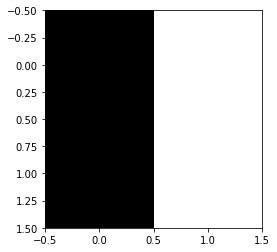

In [7]:
# RGB zu Grauwert(2d)
g_bild = [[0 for j in range(len(bild3[i]))] for i in range(len(bild3))]

for row in range(len(bild3)):
    for col in range(len(bild3[row])):
        R = bild3[row][col][0]
        G = bild3[row][col][1]
        B = bild3[row][col][2]
        gray_value = 0.30*R + 0.59*G + 0.11*B
        g_bild[row][col] = gray_value
print("\nFrom RGB to Gray:\n",g_bild)
plt.imshow(g_bild, cmap="gray")
plt.show()

### Image filtering

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def filtering(image_in, filter_matrix, fraction=1.0):
    image_out = image_in.copy()
    #Itereriere über jeden Pixel
    for row in range(len(image_out)):
        for col in range(len(image_out[row])):
            #Kein IndexOutOfBounds
            if row >= 1 and col >= 1 and row < len(image_out) - 1 and col < len(image_out[col]) - 1:
                val = 0.0
                #Iteriere über alle Pixel die unter dem Filter liegen
                for filter_matrix_row in range(-int(len(filter_matrix)/2), 
                                                int(len(filter_matrix)/2)+1):
                    for filter_matrix_col in range(-int(len(filter_matrix[filter_matrix_row])/2), 
                                                    int(len(filter_matrix[filter_matrix_row])/2)+1):
                        offset = int(len(filter_matrix[filter_matrix_row])/2)
                        #Kantenerkennung
                        val += (filter_matrix[filter_matrix_row + offset][filter_matrix_col + offset] 
                                * image_in[row + filter_matrix_row][col + filter_matrix_col])
                val = val * fraction
                image_out[row][col] = val

    return image_out

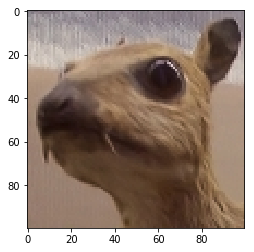

[[1 2 1]
 [2 4 2]
 [1 2 1]]


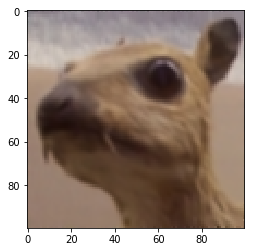

[[1 1 1]
 [1 1 1]
 [1 1 1]]


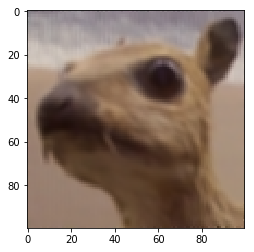

In [9]:
image = mpimg.imread('image.png')

plt.imshow(image)
plt.show()

# Binomialfilter --> Wird unsharf gemacht
binomial = np.array([[1, 2, 1], 
                    [2, 4, 2], 
                    [1, 2, 1]], dtype=np.int)
print(binomial)

image_filtered = filtering(image, binomial, fraction=1/16)

plt.imshow(image_filtered)
plt.show()

# Box blur filter
blur = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]], dtype=np.int)
print(blur)

image_filtered = filtering(image, blur, fraction=1/9)

plt.imshow(image_filtered)
plt.show()

### Faltungen auf MNIST